In [1]:
import pandas as pd
inscurance_data = pd.read_csv('AxisInsurance.csv')

In [2]:
inscurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
inscurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data_smoker_sorted = inscurance_data.sort_values('smoker')

In [5]:
df_yes, df_no = [x for _, x in inscurance_data.groupby(inscurance_data['smoker'] == 'no')]

In [6]:
df_yes.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [7]:
df_yes.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [8]:
df_no.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [9]:
df_no.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [10]:
#so
s_no = 8434.268298
n_no = 1064
s_yes = 11541.547176
n_yes = 274
s_combined = (((s_no**2)*(n_no-1)+(s_yes**2)*(n_yes-1))/(n_no+n_yes-2))**.5
print(s_combined)

9155.350078217298


In [11]:
Xbar_no = 32050.231832
Xbar_yes = 8434.268298
tstat = (Xbar_no - Xbar_yes)/(s_combined*(1/n_no+1/n_yes)**.5)
print(tstat)

38.075775096839905


In [12]:
from scipy.stats import t
T = t(df=n_no+n_yes-2, loc=0, scale=1)
pvalue = 1-T.cdf(tstat )
print(str(pvalue))

0.0


C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


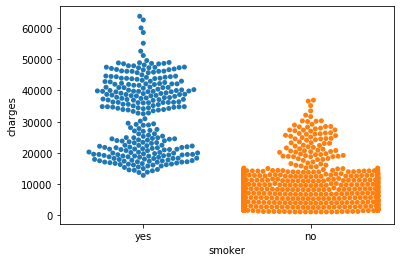

In [13]:
import seaborn as sns
sns.swarmplot(x=inscurance_data['smoker'],
              y=inscurance_data['charges'])

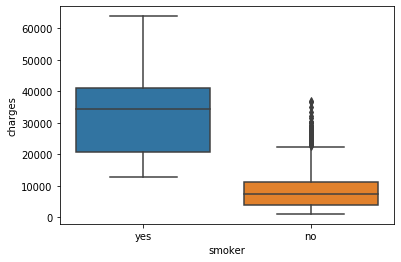

In [14]:
sns.boxplot(x="smoker", 
            y="charges", 
            data=inscurance_data)

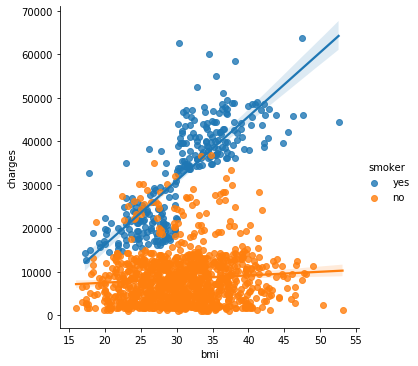

In [15]:
#todo scatterplot bmi vs charges to see what type of model seems appropriate to start with
sns.lmplot(x="bmi", y="charges", hue="smoker", data=inscurance_data)


In [16]:
xbar_yes_bmi = 30.708449
xbar_no_bmi = 30.651795

In [17]:
data_yes = pd.DataFrame(df_yes, columns=["bmi", "charges"], copy=True)
data_no = pd.DataFrame(df_no, columns=["bmi", "charges"], copy=True)
data_yes.index =range(len(df_yes))
data_no.index =range(len(df_no))

In [18]:
print(str(data_yes.head()) + "\n" +str(data_no.head()))

     bmi     charges
0  27.90  16884.9240
1  26.29  27808.7251
2  42.13  39611.7577
3  35.30  36837.4670
4  31.92  37701.8768
      bmi      charges
0  33.770   1725.55230
1  33.000   4449.46200
2  22.705  21984.47061
3  28.880   3866.85520
4  25.740   3756.62160


In [19]:
ssxy_yes=0
ssx_yes=0
ssy_yes=0
for i in range( len(data_yes) ):
    ssxy_yes += (data_yes["charges"][i] - Xbar_yes)*( data_yes["bmi"][i] - xbar_yes_bmi )
    ssx_yes +=( data_yes["bmi"][i] - xbar_yes_bmi)**2
    ssy_yes +=(data_yes["charges"][i] - Xbar_yes)**2
#y=ax+b
a_yes = ssxy_yes/ssx_yes
ssxy_no=0
ssx_no=0
ssy_no=0
for i in range(1, len(data_no) ):#not sure why this starts at 1
    ssxy_no += (data_no["charges"][i] - Xbar_no)*( data_no["bmi"][i] - xbar_no_bmi )
    ssx_no +=( data_no["bmi"][i] - xbar_no_bmi)**2
    ssy_no +=(data_no["charges"][i] - Xbar_no)**2
a_no = ssxy_no/ssx_no
print(a_yes)
print(a_no)

1473.1061983676789
85.80780378644592


In [20]:
b_yes = Xbar_yes - a_yes*xbar_yes_bmi
b_no = Xbar_no - a_no*xbar_no_bmi
print("intercept b yes: "+ str(b_yes) + ", intercept b no: "+str(b_no))

intercept b yes: -36802.53826615775, intercept b no: 29420.068620937636


In [21]:
#correlation coefficient
r_yes = ssxy_yes/(ssx_yes*ssy_yes)**.5
r_no = ssxy_no/(ssx_yes*ssy_yes)**.5
print(r_yes)
print(r_no)

0.3535921553735231
0.07333826035688949


In [22]:
df_female, df_male = [x for _, x in inscurance_data.groupby(inscurance_data["sex"] == "male")]

In [23]:
df_male.describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


In [24]:
df_female.describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [25]:
s_male = 6.046023
s_female = 6.140435
Xbar_male = 30.377749
Xbar_female = 30.943129
n_male = 662.000000
n_female= 676.000000

In [26]:
s_comb = (((s_male**2)*(n_male-1)+(s_female**2)*(n_female-1))/(n_male+n_female-2))**.5
print(s_comb)

6.093906495226955


In [27]:
tstat = (Xbar_male - Xbar_female)/(s_comb*(1/n_male+1/n_female)**.5)
print(tstat)

-1.6967542330681613


In [28]:
from scipy.stats import t
T = t(df=n_male+n_female-2, loc=0, scale=1)
pvalue = T.cdf(tstat )
print(pvalue*2)
#we cannot reject the null hypothesis that bmi of male and female are the same

0.08997606959021588


C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


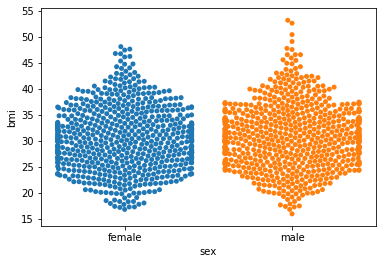

In [29]:
sns.swarmplot(x=inscurance_data['sex'],
              y=inscurance_data['bmi'])

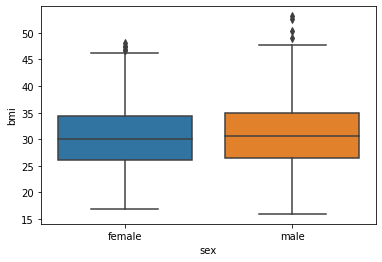

In [30]:
sns.boxplot(x="sex", 
            y="bmi", 
            data=inscurance_data)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


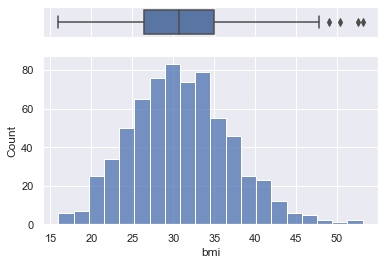

In [31]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df_male["bmi"], ax=ax_box)
sns.histplot(data=df_male, x="bmi", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [46]:
data_crosstab = pd.crosstab(inscurance_data['sex'],
                            inscurance_data['region'], 
                               margins = False)
print(data_crosstab) #maybe there is a correlation between male and smoker

region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163


In [47]:
data_crosstab = pd.crosstab(df_male['smoker'],
                            df_male['region'], 
                               margins = False)
print(data_crosstab) #maybe there is a correlation between male and smoker

region  northeast  northwest  southeast  southwest
smoker                                            
no            125        132        134        126
yes            38         29         55         37


In [49]:
data_crosstab = pd.crosstab(df_female['smoker'],
                            df_female['region'], 
                               margins = False)
print(data_crosstab) #maybe there is a correlation between male and smoker

region  northeast  northwest  southeast  southwest
smoker                                            
no            132        135        139        141
yes            29         29         36         21


In [32]:
data_crosstab = pd.crosstab(inscurance_data['smoker'],
                            inscurance_data['region'], 
                               margins = False)
print(data_crosstab)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


In [62]:
print(((   67     +    58    +     91    +     58)/ (67     +    58    +     91    +     58+257    +    267     +   273  +      267)))

0.20478325859491778


In [33]:
import scipy
scipy.stats.chi2_contingency(data_crosstab)

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

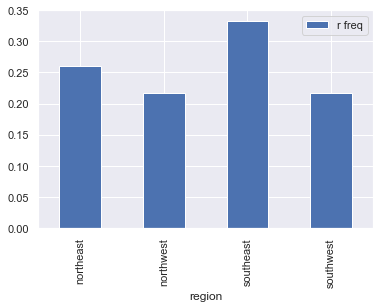

In [60]:
#pvalue is .061719
import matplotlib.pyplot as plt
# Bar chart showing average score for racing games by platform
rf=[67/257,58/267,91/273,58/267]
smoke={ 'region':["northeast",  "northwest",  "southeast",  "southwest"],
       'r freq':rf}
df = pd.DataFrame(smoke)
ax = df.plot.bar(x='region', y='r freq', rot=0, grid = True)
plt.xticks(rotation=90)

In [35]:
#mean bmi of no children 1 or 2
df_, df_0 = [x for _, x in df_female.groupby(df_female['children'] == 0)]
df_, df_1 = [x for _, x in df_female.groupby(df_female['children'] == 1)]
df_, df_2 = [x for _, x in df_female.groupby(df_female['children'] == 2)]
print("0 children: "+str(df_0))
print(" 1 child: "+str(df_1))
print(" 2 children: "+str(df_2))

0 children:       age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
5      31  female  25.74         0     no  southeast   3756.62160
9      60  female  25.84         0     no  northwest  28923.13692
11     62  female  26.29         0    yes  southeast  27808.72510
13     56  female  39.82         0     no  southeast  11090.71780
...   ...     ...    ...       ...    ...        ...          ...
1331   23  female  33.40         0     no  southwest  10795.93733
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030

[289 rows x 7 columns]
 1 child:       age     sex     bmi  children smoker     region      charges
6      46  female  33.440         1     no  southeast   8240.58960
16     52  female  30.780   

In [36]:
df_0.describe()

,age,bmi,children,charges
count,289.000000,289.000000,289.0,289.000000
mean,38.346021,30.361522,0.0,11905.714276
std,16.358335,5.966934,0.0,11471.881191
min,18.000000,17.290000,0.0,1607.510100
25%,22.000000,26.200000,0.0,3171.614900
50%,36.000000,29.925000,0.0,9541.695550
75%,56.000000,34.600000,0.0,14133.037750
max,64.000000,47.410000,0.0,63770.428010


In [37]:
df_1.describe()

,age,bmi,children,charges
count,158.000000,158.000000,158.0,158.000000
mean,39.506329,30.052658,1.0,12161.360414
std,11.428954,5.786831,0.0,11071.976512
min,18.000000,16.815000,1.0,2201.097100
25%,30.000000,25.982500,1.0,5046.491400
50%,41.000000,29.567500,1.0,8232.868150
75%,48.000000,33.942500,1.0,14287.374210
max,64.000000,46.090000,1.0,58571.074480


In [38]:
df_2.describe()

,age,bmi,children,charges
count,119.000000,119.00000,119.0,119.000000
mean,40.512605,30.64979,2.0,13941.317326
std,12.248740,6.62820,0.0,11419.324548
min,18.000000,17.19500,2.0,2801.258800
25%,31.000000,25.77000,2.0,6358.025175
50%,42.000000,31.30000,2.0,10107.220600
75%,50.500000,34.75000,2.0,15649.704400
max,64.000000,48.07000,2.0,47305.305000


In [39]:
data_crosstab_children = pd.crosstab(df_female["bmi"].mean(),
                            df_female['children'], 
                               margins = False)
print(data_crosstab_children)

children     0    1    2   3   4  5
row_0                              
30.377749  289  158  119  77  11  8


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Group by
no_children = df_0["bmi"]
one_children = df_1["bmi"]
two_children = df_2["bmi"]

In [41]:
stats.f_oneway(no_children, one_children, two_children)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


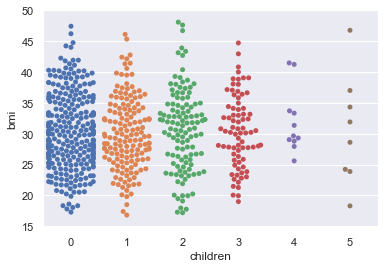

In [42]:

sns.swarmplot(x=df_female['children'],
              y=df_female['bmi'])

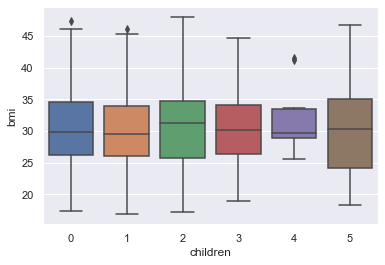

In [43]:
sns.boxplot(x="children", 
            y="bmi", 
            data=df_female)

In [45]:
sns.heatmap(inscurance_data["charges"])

IndexError: Inconsistent shape between the condition and the input (got (1338, 1) and (1338,))

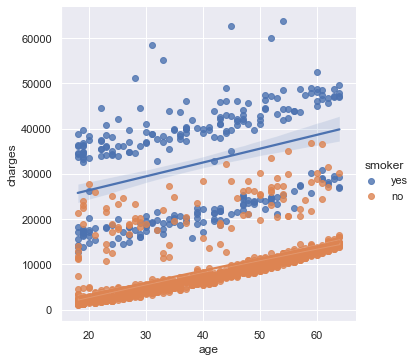

In [56]:
#todo scatterplot bmi vs charges to see what type of model seems appropriate to start with
sns.lmplot(x="age", y="charges", hue="smoker", data=inscurance_data)

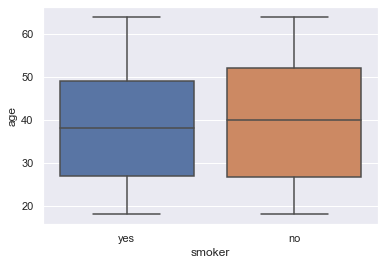

In [52]:
sns.boxplot(x="smoker", 
            y="age", 
            data=inscurance_data)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


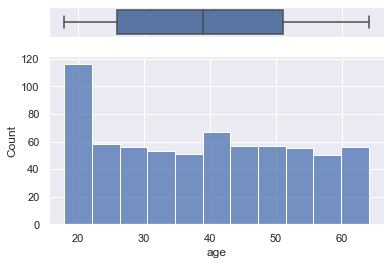

In [54]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df_male["age"], ax=ax_box)
sns.histplot(data=df_male, x="age", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


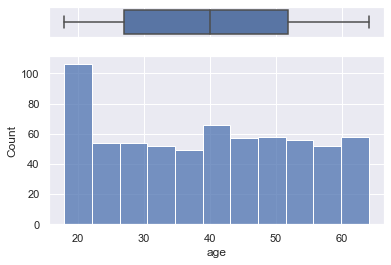

In [55]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df_female["age"], ax=ax_box)
sns.histplot(data=df_female, x="age", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

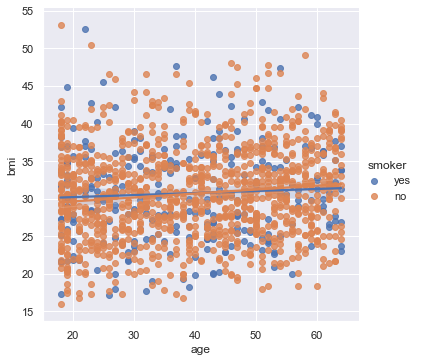

In [57]:
#todo scatterplot bmi vs charges to see what type of model seems appropriate to start with
sns.lmplot(x="age", y="bmi", hue="smoker", data=inscurance_data)

In [ ]:
df_yes, df_no = [x for _, x in inscurance_data.groupby(inscurance_data['smoker'] == 'no')]
#youth, and smoking early 20s
#sex vs smoking relationship histogram
#smoker non histogram
#smoker split sex vs bmi
#are the high bmi driving costs and how would this compare to the smoking? How does this compare to smoking
#visualization on this 
